In [27]:
new_base_dir = r'/home/disk/eos4/jkcm/Data/MEASURES/classified_data/unified_filtered/good_npz'
filter_dir = r'/home/disk/eos4/jkcm/Data/MEASURES/classified_data/unified_filtered/good'
old_base_dir = r'/home/disk/eos4/jkcm/Data/MEASURES/classified_data/npz/'
matching = {'cat1': 'closed_mcc', 
           'cat2': 'clustered_cu',
           'cat3': 'disorg_mcc',
           'cat4': 'open_mcc',
           'cat5': 'other',
           'cat6': 'solid_sc',
           'cat7': 'suppressed_cu'}

rev_matching = dict([v,k] for k,v in matching.items())


def check_file(filename, cat):
    filtered_list = [f[:-10] for f in os.listdir(os.path.join(filter_dir, matching[cat]))]
    file_match = filename[4:-17]
    
#     print(filtered_list[1])
#     print(file_match)
    return file_match in filtered_list

for base_fold in [os.path.join(old_base_dir, i) for i in os.listdir(old_base_dir)]:
    for cat in os.listdir(base_fold):
        cat_fold = os.path.join(base_fold, cat)
        files = os.listdir(cat_fold)
        files_to_copy = []
        for f in files: 
            if check_file(f, cat):
                files_to_copy.append(f)
        for f in files_to_copy:
            src = os.path.join(cat_fold, f)
            dst = os.path.join(new_base_dir, matching[cat], f)
            if not os.path.exists(os.path.join(new_base_dir, matching[cat])):
                os.mkdir(os.path.join(new_base_dir, matching[cat]))
#             os.link(src, dst)
#         print('{}: {}/{}'.format(cat, len(files_to_copy), len(files)))
    

In [63]:
#MAKE SOME DATES
import datetime as dt

s = r'https://ladsweb.modaps.eosdis.nasa.gov/search/order/4/MYD03--61/2015-07-01..2015-07-14/D/World'
s_pat = r'https://ladsweb.modaps.eosdis.nasa.gov/search/order/4/MYDATML2--61/{:%Y-%m-%d}..{:%Y-%m-%d}/D/World'

In [64]:
date1 = dt.datetime(2015, 7, 1)
dates = [date1 + dt.timedelta(days=i*14) for i in range(33)]
dates.append(dt.datetime(2016,10,1))

In [65]:
date_pairs = [(dates[i], dates[i+1]-dt.timedelta(days=1)) for i in range(len(dates))[:-1]]

In [66]:
url_list = [s_pat.format(i[0], i[1]) for i in date_pairs]

In [12]:
csv_list =[os.path.join(r'/home/disk/eos4/jkcm/Data/MEASURES/MODIS_downloads', i) for i in  os.listdir(r'/home/disk/eos4/jkcm/Data/MEASURES/MODIS_downloads')]

In [25]:
df = pd.read_csv(csv_list[0])
for f in csv_list[1:]:
    df_1 = pd.read_csv(f)
    df.append(df_1, ignore_index=True, sort=True)

In [58]:
files = df[df.columns[1]].values
def swap_in_type(filename, old, new):
    return new.join(filename.split(old))
atm1_files = [swap_in_type(i, old="MYD03", new="MYDATML2") for i in files]
atm1_files = [swap_in_type(i, old="2018061172505", new="2018062092534") for i in atm1_files]
laads_prefix = r'https://ladsweb.modaps.eosdis.nasa.gov'
all_files = [laads_prefix+i for i in atm1_files]

In [ ]:
ATML2_files = glob.glob(r'/home/disk/eos4/jkcm/Data/MEASURES/MODIS_downloads/MYDATML2/MYD*.hdf')
def land_frac(granule_file):
    with xr.open_dataset(granule_file) as d:
        land_pts = [globe.is_land(i,j) for i,j in zip(d.Latitude.values.flatten()[::200], d.Longitude.values.flatten()[::200])]
    return np.sum(land_pts)/len(land_pts)
# all_land_frac = [land_frac(i) for i in ATML2_files]
lt = LoopTimer(len(ATML2_files))
all_land_frac = []
problem_cases = []
for i in ATML2_files:
    lt.update()
    try:
        all_land_frac.append(land_frac(i))
    except IndexError as e:
        all_land_frac.append(np.nan)
        problem_cases.append((i,e))

In [25]:
#make updated download list, excluding already downloaded files
laads_prefix = r'https://ladsweb.modaps.eosdis.nasa.gov'

list_of_existing_files = [os.path.basename(i) for i in glob.glob(r'/home/disk/eos4/jkcm/Data/MEASURES/MODIS_downloads/MYDATML2/MYD*.hdf')]
list_of_all_files = [os.path.basename(i) for i in atml2_files]
files_still_to_get = [laads_prefix+i for i,j in zip(atml2_files, list_of_all_files) if i not in list_of_existing_files]

In [27]:
save_file = r'/home/disk/eos4/jkcm/Data/MEASURES/MODIS_downloads/MYDATML2/updated_list_of_MYDATML2_files.txt'
with open(save_file, 'w') as f:
    for fname in files_still_to_get:
        f.writelines(fname+'\n')

In [2]:
from MEASURES_process_utils import convert_csv_to_wget_list
fname = '/home/disk/eos9/jkcm/Data/modis/SEP/LAADS_query.2019-12-10T06_51.csv'
_ = convert_csv_to_wget_list(fname)

In [4]:
import os
import glob

In [16]:
MOD02_file = r'MYD021KM.A2015185.1610.061.2018050124556.hdf'
MOD06_folder = r'/home/disk/eos9/jkcm/Data/modis/MYD06/'
'.'.join(os.path.basename(MOD02_file).split('.')[1:3:])

'A2015185.1610'

In [ ]:
glob.glob(os.path.join(MOD06_folder, 'MYD06*'))

In [15]:
os.listdir(MOD06_folder)

['2015']

In [42]:
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
print('bernana!')

bernana!


In [6]:
tfile = r'/home/disk/eos9/jkcm/Data/modis/MYD03/MYD03.A2015228.1725.061.2018051001429.hdf'

In [21]:
ds = Dataset(tfile)
ds.variables.keys()

odict_keys(['Latitude', 'Longitude', 'Scan Offset', 'Track Offset', 'Height Offset', 'Height', 'SensorZenith', 'SensorAzimuth', 'Range', 'SolarZenith', 'SolarAzimuth', 'Land/SeaMask', 'WaterPresent', 'gflags', 'Scan number', 'EV frames', 'SD frames', 'SV frames', 'EV start time', 'SD start time', 'SV start time', 'EV center time', 'Mirror side', 'SD Sun zenith', 'SD Sun azimuth', 'Moon Vector', 'L1 scan quality', 'Geo scan quality', 'orb_pos', 'orb_vel', 'T_inst2ECR', 'attitude_angles', 'sun_ref', 'num_impulse', 'impulse_enc', 'impulse_time', 'Scan Type', 'thermal_correction', 'attitude_quality', 'ephemeris_quality', 'Focal_length', 'band_position', 'detector_space', 'detector_offsets', 'T_offset', 'num_samples'])

In [95]:
lat = ds.variables['Latitude']
lon = ds.variables['Longitude']
zen = ds.variables['SensorZenith']
ran = ds.variables['Range']
def get_dlondx(lat) : return(360/(np.cos(np.deg2rad(lat))*4.0075017e7))
dlondx = get_dlondx(lat[:])
dxdlon = 1/dlondx/1000
dlatdy = 360/4.000786e7
dydlat = 1/dlatdy/1000

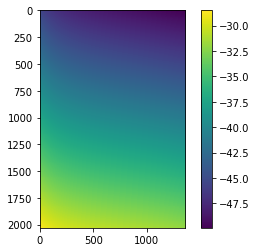

In [101]:
lon_grad = np.gradient(lon[:])[1]
lat_grad = np.gradient(lat[:])[1]
dx = np.abs(lon_grad*dxdlon)
dy = np.abs(lat_grad*dydlat)

zenmask = np.nanmean(zen[:].filled(), axis=0)<45
plt.imshow(lat)
plt.colorbar()

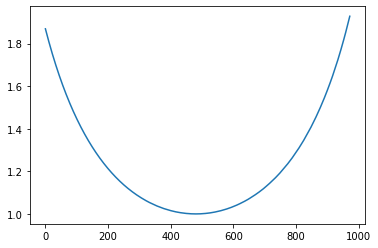

In [91]:
plt.plot(np.nanmean(dx[:,zenmask], axis=0))

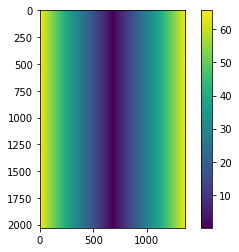

In [65]:
plt.imshow(zen)
plt.colorbar()

array([False, False, False, ..., False, False, False])

In [1]:
import numpy as np

In [9]:
sea_data = '/home/disk/eos4/jkcm/Data/MEASURES/beta_data/model_predictions_SEA.npz'
data = np.load(sea_data)
files, cert, pred = data['files'], data['pred_prob'], data['pred_cat']
data.close()

In [12]:
files

array([b'IMG_MOD021KM.A2001244.0955.061_index_0896_index_0128.npz',
       b'IMG_MOD021KM.A2001244.0955.061_index_1024_index_0128.npz',
       b'IMG_MOD021KM.A2001244.0955.061_index_1024_index_0256.npz', ...,
       b'IMG_MOD021KM.A2003273.1140.061_index_1536_index_1024.npz',
       b'IMG_MOD021KM.A2003273.1140.061_index_1664_index_0896.npz',
       b'IMG_MOD021KM.A2003273.1140.061_index_1664_index_1024.npz'],
      dtype='|S56')